# Assignment 8
### Nathan Monges
### 05/03/2024

### The libraries you will use are already loaded for you below

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes. Print the number of unique genres. This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replace you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them. 

In [6]:
# your code here

titles = pd.read_csv('/Users/nathanmonges/Documents/DSE5002/titles.csv')

credits = pd.read_csv('/Users/nathanmonges/Documents/DSE5002/credits.csv')

titles.head()

genres_list = list(titles['genres'].unique())

for i in range(len(genres_list)):
    genres_list[i] = genres_list[i].replace("[", "").replace("'", "").replace(",", "").replace("]", "")
    genres_list[i] = genres_list[i].split()
    
genres_flattend = list(chain.from_iterable(genres_list))

# found online that need to convert "genres_flattend" into a series b/c 'list' objects do not have .unique()
genres_series = pd.Series(genres_flattend)
len(genres_series.unique())


19

## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. To do this you will need to aggregate the means by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

In [7]:
# your code here

titles.head()

scores_by_year= titles.groupby("release_year")["imdb_score"].mean()
scores_df = scores_by_year.to_frame()

scores_df.reset_index(inplace=True)

scores_df.idxmax() #show index of max release year and max score (29)

print(scores_df.iloc[29]) #print year and socre of max score 

release_year    1985.0
imdb_score         8.0
Name: 29, dtype: float64


## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

In [65]:
# your code here

films = titles.merge(credits, how="right", on="id")

films2 = films[films["role"] == "ACTOR"]
films2.dropna(subset="role")

actor_counts = films2.groupby("title")["role"].count()

print("Movie with the most credited actors is", actor_counts.idxmax())

Movie with the most credited actors is Les Misérables


## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 

Movie Name: Taxi Driver
Release Year: 1976


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='imdb_score', ylabel='release_year'>

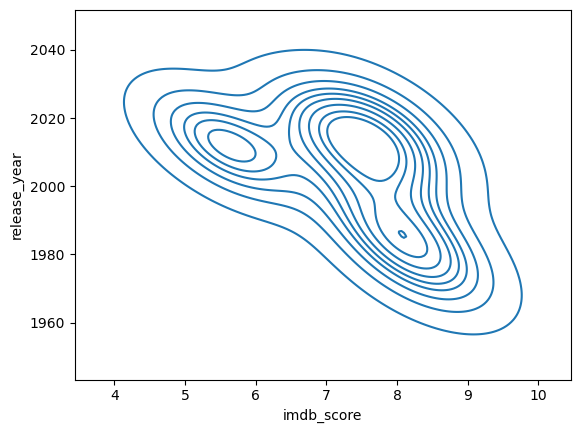

In [66]:
# your code here

movies = titles.merge(credits, how="right", on="id")

# Movie with highest imdb score fro Rob De Niro
rob_movies = movies[movies["name"] == "Robert De Niro"]
rob_movies["imdb_score"].idxmax() #max at index 0
print("Movie Name:", rob_movies.loc[0, "title"])
print("Release Year:", rob_movies.loc[0, "release_year"])

sns.kdeplot(x=rob_movies.imdb_score, y=rob_movies.release_year)


## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


Number of War Movies: 437
Number of Gangster Movies: 35
War Movies have a higher average IMDB score of 6.77 compared to Gangster Movies score of 6.39


/var/folders/f4/pcf9r9h91lbgszy1pxgprndr0000gn/T/ipykernel_53221/861048020.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=war_movies["imdb_score"], shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/f4/pcf9r9h91lbgszy1pxgprndr0000gn/T/ipykernel_53221/861048020.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=gangster_movies["imdb_score"], shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remove

<Axes: xlabel='imdb_score', ylabel='Density'>

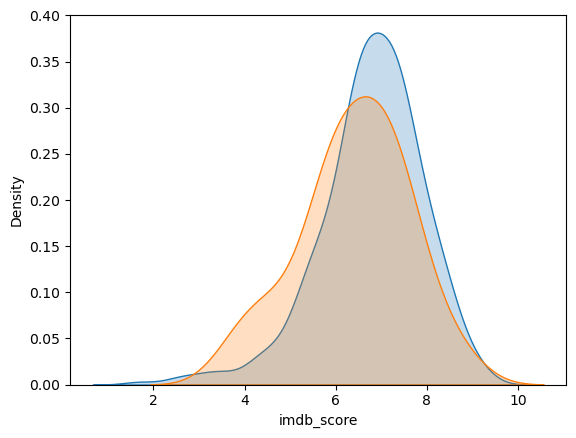

In [71]:
# your code here

titles["war_movies"] = titles.description.str.contains("war", case=False, na=False)
titles["gangster_movies"] = titles.description.str.contains("gangster", case=False, na=False)

war_movies = titles[titles.war_movies == True]
gangster_movies = titles[titles.gangster_movies == True]
war_movies.title.count() #number of war movies 
gangster_movies.title.count() #number of gangster movies
print("Number of War Movies:", war_movies.title.count())
print("Number of Gangster Movies:", gangster_movies.title.count())

war_movies["imdb_score"].aggregate("mean") #avg imdb score for war movies
gangster_movies["imdb_score"].aggregate("mean") #avg imdb score for gangster movies

print("War Movies have a higher average IMDB score of", round(war_movies["imdb_score"].aggregate("mean"),2),
      "compared to Gangster Movies score of", round(gangster_movies["imdb_score"].aggregate("mean"),2))

sns.kdeplot(data=war_movies["imdb_score"], shade=True)
sns.kdeplot(data=gangster_movies["imdb_score"], shade=True)

